# Homework 05 - Pipelining, Hazards, Branch Prediction, and Memory Hierarchy

### Assigned for Spring 2024 Semester: 2/29/2024
### Due for Spring 2024 Semester: 3/7/2024 at 11:59pm on Gradescope

> <b>Note:</b> Review the <a href = "https://github.com/mmorri22/cse30321/blob/main/cse30321-syllabus.md">Course Syllabus</a> for policies regarding late submissions for Homework Assignments, as well as homework collaboration. You are welcome to study together, but the final submission must be your own good-faith attempt.

## Homework Format Instructions

Compile all your solutions into a single PDF and upload your solutions through the Gradescope submission link. Review the detailed steps for submission at the bottom on this page

## Part 1 - Reading and Lecture Review

The material for this assignment covers Lectures 11-13.

<b>Problem 1</b> - 75 points - Define Pipeline Hazard. State and define the three types of pipeline hazards. 

<b>Problem 2</b> - 50 points - Assuming N computations, K stages in an ideal simple linear pipeline and tsc as clock period, derive the equation for speedup compared to a non-pipeline and its throughput, where the clock cycle for single cycle is tsc and pipelined is tp.

<b>Problem 3</b> - 75 points - Describe how Data Forwarding is performed in the RISC-V datapath. A full-credit answer will include discussion of what data is forwarded back to the ALU, how those data elements are forwarded back to the ALU, and how the specific data that goes to the ALU is selected. 

<b>Problem 4</b> - 100 points - Describe the process for implementing exceptions and interrupts. A full-credit answer will include a description of exceptions and interrupts on the RISC-V datapath, where the information regarding the exception is stored, how RISC-V prioritizes exceptions, and how the datapath is "cleared" once an exception is found.

## Part 2 - Pipelining

> In the last assignment, you were permitted to use the <code>lui</code> and <code>srai</code> instructions when entering values into registers to assist your understanding as you transitioned from albaCore to RISC-V. Now that you have more experience with RISC-V, you will be expected to use the <code>lui</code> and <code>addi</code> instructions optimizations to enter the values into the registers on HW 3 and the Exams (as shown in the Lecture 05 In-Class code solution). You are permitted to assume that the integers we will use on these problems fit into the immediate lengths on Homeworks and Exams.

<b>Problem 5</b> - 125 points - Consider the following RISC-V code sequence 

    add x7, x18, x20
    lw  x21, 20(x7)
    add x5, x21, x22
    sub x23, x5, x21
    or  x23, x21, x22
    sw  x23, 20(x5)

a) Assuming no forwarding, identify all pipeline hazards between pairs of instructions

b) Assuming no forwarding, insert stalls as needed to overcome these hazards. How many clock cycles are needed to finish these instructions?

c) Assuming we use forwarding, insert stalls as needed to overcome these hazards. How many clock cycles are needed to finish executing these instructions?
    
    
<b>Problem 6</b> - 125 points - Consider the following RISC-V code sequence 

    lw   x18, 40(x10)
    add  x22, x10, x18
    lw   x19, 44(x10)
    or   x23, x22, x18
    lw   x24, 48(x10)
    addi x6, x24, -7

a) Assuming we use forwarding, insert stalls as needed to overcome these hazards. How many clock cycles are needed to finish executing these instructions?

b) Rearrange the instructions to minimize the need for stalls. How many clock cycles are needed to finish executing these instructions?

## Part 3 - Branch Prediction

<b>Problem 7</b> - 125 points - Draw the 2-bit branch prediction FSM. Then, given the following branch addresses and branches, show the final state of a k=3 correlating prediction model

|Address|T/N|
|:--|:--|
|10001101|T|
|10001000|N|
|10001101|T|
|10001111|N|
|10001101|N|
|10001000|T|
|10001000|T|
|10001101|T|
|10001111|T|

<b>Problem 8</b> - 125 points - Assume 35% of instructions change the flow of a program:

28% of instructions are branches
<ul>
    <li>25% of branches are taken</li>
    <li>Mispredicted branches result in a 3 cycle stall (wait for address to be calculated)</li>
</ul>

7% of instructions are loads
<ul>
    <li>45% of the time, the next instruction uses the loaded value</li>
</ul>

What is the impact on performance assuming:
<ul>
    <li>Every load instruction takes 3 cycles</li>
    <li>There is an additional 1 cycle stall for load hazard</li>
    <li>Always predict branch not taken</li>
    <li>5-stage datapath</li>
</ul>

## Part 4 - Combining Concepts

<b>Problem 9</b> - 200 points - Consider the following pseudo-C code where a loop compares data elements from two arrays.  If the element in the first array is less than the element in the second array, the value of the second array is set to the value of the first array; otherwise it is set to 0.  Register names are used as variable names to tie to the RISC-V code in the pipe traces (below) that implements this loop.  

> Note: Where we would normally use variable names, we have replaced this with register names to 

	while (x18 < x20) {	//assume x20 was initialized to 1000 earlier
		x21 = x19[x18];
		x22 = x23[x18 + 4];
		if (x21 < x22)
		  x23[x18 + 4] = x21;
		else
		  x23[x18 + 4] = 0;
		x18 = x18 + 1;
	}
    x20 = x20 + x18


Complete the pipe trace. You should assume: 
<ol>
    <li>At the first instance of loop <code>bge</code> instruction is <b>not taken</b> and <b>predicted correctly</b>, and that correct predictions incur no delay (thus, assume the <code>slli</code> is fetched in cycle)</li>
    <li>At the <code>if</code> statement, , <code>x21</code> is less than <code>x22</code> and the second <code>bge</code> instruction is <b>predicted incorrectly</b></li>
    <li>At the second instance of the <code>while</code> statement, <code>x18</code> is equal to <code>x19</code> and the corresponding <code>bge</code> instruction is <b>predicted incorrectly</b></li>
    <li>All <code>jump</code> instructions are predicted correctly (again, assume no delay/stall cycle needed)</li>
    <li>Hazard detection and data forwarding in this RISC-V datapath</li>
    <li>the outcome of a branch is definitively known after it finishes the EX stage, and there is no additional flush latency - in other words, on a branch misprediction the first instruction on the correct path will be fetched 1 cycle after the branch’s Execute stage</li>
</ol>

Recall that RISC-V registers have <b>write, then read</b> capabilities In all parts of this problem, you may assume that a register can be written and read from the register file in the same clock cycle.  You only need to fill this pipe trace for 1 iteration (i.e., the instructions below).  Finally, note there may be more columns in the pipe trace than needed.

> <b>Hint 1:</b> Since one or more instructions will be called twice,use the locations later in the table for the second instruction instance. For example, if the loop back to the first bge instruction would occur at cycle 13, this means the jump's fetch occured at cycle 12, so put F for fetch at cycle 13 for bge.
> For example, a misprediction will look like this:

> <code>                           1 2 3 4 5 6 7 9 0 1 <font color="red">2 3</font> 4 5 6 7
> <code>loop:</code>
> <code>bge x18, x20, out          F D E M W             <font color="red">F</font> D E M E</code>
> <code>....                         F D E M W                                             </code>
> <code>....                           .........                                           </code>
> <code>....                             .........                                         </code>
> <code>j loop                                         <font color="red">F</font> D E M W  </code><br>

> <b>Hint 2:</b> For branch mispredictions, simply put the number of stalls. We will represent that as the misprediction. Put the F instruction at the cycle <i>after</i> the execute in the previous execution.
> For example, a misprediction will look like this:<br>
> <br>
> <code>bge x21, x22, else          F D <font color="blue">E</font> M W</code><br>
> <code>sw  x21, 4(x24)             <font color="red">  S S</font> <font color="blue">F</font> D E M W</code>
>
> And a correct prediction will look like this, since there are no stalls
> 
> <code>bge x21, x22, else          F D E M W</code><br>
> <code>sw  x21, 4(x24)               F D E M W</code>

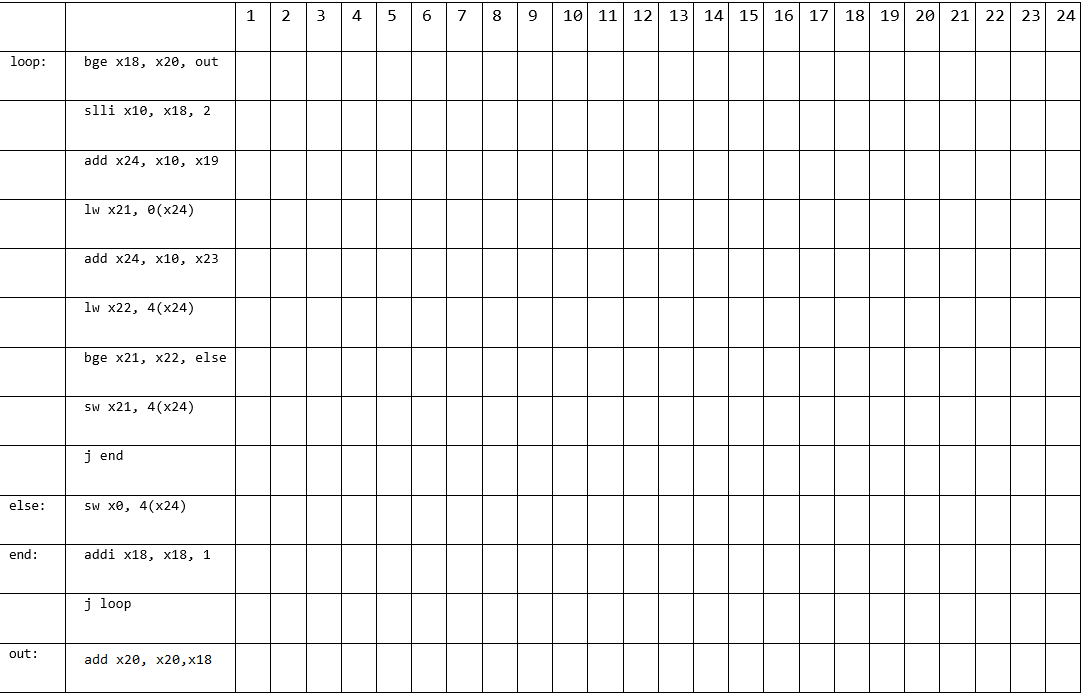

## Part 5 - Submission on Gradescope

Upload a single PDF to Gradescope using the following link by the due date on the Canvas <a href = "https://canvas.nd.edu/courses/82217/pages/lecture-notes-and-schedule">Lecture Notes and Schedule page</a>

### <a href = "https://canvas.nd.edu/courses/82217/assignments/260274">Homework 05 Gradescope Submission Link</a>

You are required to link the Problems with the page where the solution may be found. This requirement is to ensure that that TAs may easily find your answers, so that grades are returned promptly and that errors in grading are prevented.